In [1610]:
import pandas as pd
import numpy as np

In [1611]:
# Import dataset
df = pd.read_csv('../data/base_modelis_pass_det.csv',sep = ';')

liste_var = [#'mt_dec_cum_IMP_tot','EAD_1an_avant_def','cum_frs_externes','fl_prise_de_gar', 'cum_rec', 'fam_ETH', 'CD_DNE_CHR_LGD_SAIN','CD_MTF_ENE_CTX',
             # anciennes variables ->
             'CD_NATUR_OP_PFI', 'CD_SITFAM_EMP1', 'sol_echec', 'CD_MTF_DFC', 'regroup_natur_op', 'fam_PCD', 'fl_prise_de_gar', 'mt_dec_cum_IMP_tot', 'dat_dec_echec', 'fam_ENQ',
 'niv_gravite_mtf_dne', 'fl_fam_vam', 'fl_pass_DET', 'arrete', 'cd_op']



liste_var = ['AMI', 'regroup_natur_op' , 'fl_fonc', 'fl_prt_Conso', 'nb_empr_ope' , 'niv_gravite_mtf_dfs', 'CD_MTF_DFC', 'sol_echec', 'fam_PCD', 'solution', 'dat_dec_echec', 'NB_RP_HOP', 'CD_DNE_CHR_LGD_SAIN', 'CD_SITFAM_EMP1', 'CD_CSP_EMP1', 'CD_ETAT_CIVIL', 'CD_NATUR_OP_PFI', 'MT_CHA_CSM_REV', 'MT_CHA_IMP', 'MT_CHA_PIP', 'MT_CHA_PIV', 'mt_rev_dispo', 'MT_CHG_MSL', 'MT_REST_VIVRE', 'ANC_BANC_MAX_PFI', 'TX_ENDET', 'CD_MTF_ENE_CTX', 'MT_PATRIM_NET', 'ANC_PRO_MAX_PFI', 'MT_CHA_HORS_OPE_PFI', 'NB_CHARGE_HORS_OPE_PFI', 'max_age_ctx', 'EAD_1an_avant_def', 'MT_REV_PFI', 'TX_APPOR', 'cum_frs_externes', 'MT_PATRIM_MOB', 'AGE_EMP1', 'dls_ges_def', 'NB_DUR_PFI', 'mt_dec_cum_IMP_tot', 'MT_FMG', 'MT_EAD_RESID', 'cum_dec', 'nb_bienHOP', 'dls_mep_entree_def', 'CD_POST_BIEN_PFI', 'cum_rec', 'MT_EAD_DNE_CHR_d', 'MR_arr', 'NB_LO_HOP','fl_pass_DET', 'arrete', 'cd_op','date_entree_defaut'
             , 'NB_DUR_PFI',
'CD_NATUR_OP_PFI',
'regroup_natur_op',
'DT_MEP_OPE',
'nb_prt',
'FL_REL_NON_ANNULE'
]

liste_var = list(set(liste_var))
# Variables selctionnées
df = df[liste_var]#'CD_NAT_EMP1', 'CD_NAT_EMP2','CD_CSP_EMP2' trop de NaN pour ces var ,'CD_DEST_PFI',  'CD_CSP_EMP1'


'MT_CHA_PIP', 'FL_ETR', 'cum_frs_externes', 'MT_EAD_RESID',
       'fl_prise_de_gar', 'fam_ETH', 'fam_ENQ', 'fam_hyp', 'dat_dec_echec',
       'solution', 'fam_PCD', 'dtSRT1st', 'CD_MTF_ENE_CTX',
       'niv_gravite_mtf_dne', 'niv_gravite_mtf_dfs', 'dls_mep_entree_def',
       'nb_bienHOP', 'ANC_PRO_MAX_PFI', 'nb_empr_ope', 'fl_def_ss_pass_CTX',
       'mt_dec_cum_IMP_tot', 'AMI', 'PTG', 'AGE_EMP2',

# DataTreatment

In [1612]:
filtre = (df.select_dtypes(include = 'number').nunique()<10)
for col in df.select_dtypes(include = 'number').loc[:,filtre].columns:
    df[col] = df[col].astype('object')

In [1613]:
df['arrete'] = pd.to_datetime(df['arrete'])

df['date_entree_defaut'] = pd.to_datetime(df['date_entree_defaut'])

df['DT_MEP_OPE'] = pd.to_datetime(df['DT_MEP_OPE'], format='%d%b%Y:%H:%M:%S.%f')


C:\Users\baheu\AppData\Local\Temp\ipykernel_11088\3940570831.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['arrete'] = pd.to_datetime(df['arrete'])
C:\Users\baheu\AppData\Local\Temp\ipykernel_11088\3940570831.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['date_entree_defaut'] = pd.to_datetime(df['date_entree_defaut'])


In [1614]:
df['DT_MEP_OPE'] = df['arrete'] - df['DT_MEP_OPE'] # pour avoir l'info de la recence du pret
df['DT_MEP_OPE'] = df['DT_MEP_OPE'].dt.days

In [1615]:
liste_det = df[df['fl_pass_DET'] == 1]['cd_op']

# on applique le det ou non à toutes les lignes des indiv pour ne garder que la première ligne par individu et garder l'info du passage en DET ou non

df['DET'] = np.where(df['cd_op'].isin(liste_det), 1, 0)

Ensuite on va supprimer les individus qui n'ont qu'une ligne dans le dataframe car ce sont des anomalies.

In [1616]:
anomalie = (df['cd_op'].value_counts() ==1)
anomalie = pd.DataFrame(anomalie)
liste_anomalie = anomalie[anomalie['count']==True].index

In [1617]:
df['anomalie'] = np.where(df['cd_op'].isin(liste_anomalie), 1, 0)

In [1618]:
df = df[df['anomalie'] == 0]

In [1619]:
df.drop(columns = ['fl_pass_DET','anomalie'], inplace = True)

In [1620]:
df_ph = df.drop_duplicates(subset = 'cd_op' , keep = 'last')
df = df.drop_duplicates(subset = 'cd_op' , keep = 'first')

# Correction des dates pour ne plus avoir de durées négatives

In [1621]:
df_ph['date_entree_defaut'] = np.where((df_ph['arrete'] - df_ph['date_entree_defaut']).dt.days < 0,
                                       df_ph['date_entree_defaut'] - pd.DateOffset(years=1),
                                       df_ph['date_entree_defaut'])

# NaNs

In [1622]:
df.isna().sum()

MT_CHG_MSL                 3562
MT_PATRIM_NET               280
EAD_1an_avant_def             2
TX_APPOR                      1
dat_dec_echec                 0
ANC_PRO_MAX_PFI             241
arrete                        0
MT_EAD_RESID                  0
FL_REL_NON_ANNULE             0
nb_bienHOP                    0
cum_frs_externes              0
dls_mep_entree_def            0
NB_LO_HOP                 11363
CD_MTF_DFC                  801
MT_CHA_CSM_REV             6422
CD_DNE_CHR_LGD_SAIN           2
MT_EAD_DNE_CHR_d              0
mt_rev_dispo               3562
MT_REST_VIVRE              1899
MR_arr                        0
NB_DUR_PFI                    0
fl_fonc                       0
CD_SITFAM_EMP1                0
AMI                        4580
solution                      0
AGE_EMP1                      0
date_entree_defaut            0
NB_CHARGE_HORS_OPE_PFI      155
cum_dec                       0
MT_CHA_IMP                 6422
max_age_ctx                   4
MT_CHA_P

In [1623]:
for col in df.select_dtypes(include = 'number').columns:
    valeur = df[col].median()
    df[col].fillna(valeur, inplace=True)
    
    
for col in df.select_dtypes(include = 'object').columns:
    valeur = df[col].mode()
    df[col].fillna(valeur.iloc[0], inplace=True)

In [1624]:
for col in df_ph.select_dtypes(include = 'number').columns:
    valeur = df_ph[col].median()
    df_ph[col].fillna(valeur, inplace=True)
    
    
for col in df_ph.select_dtypes(include = 'object').columns:
    valeur = df_ph[col].mode()
    df_ph[col].fillna(valeur.iloc[0], inplace=True)

# Regroupement de categories 

### Motif

In [1625]:
motif_tres_mauvais = ['ESC' , 'REL', 'ORG', 'PPE', 'DEC', 'SIN']
motif_mauvais = ['MOR', 'CHO', 'DIV', 'SUR', 'RIS', 'SEP', 'SAN', 'CON', 'DI1' ]  
motif_moyen = ['BDF', 'AUT', 'PCL', 'PCT', 'YYY']

df['Motif'] = np.select(
    [
        df['CD_MTF_DFC'].isin(motif_tres_mauvais),
        df['CD_MTF_DFC'].isin(motif_mauvais),
        df['CD_MTF_DFC'].isin(motif_moyen)
    ],
    ['Motif tres mauvais', 'Motif mauvais', 'Motif moyen'],
    default='Motif moyen')
df.drop(columns ='CD_MTF_DFC', inplace = True)

In [1626]:
motif_tres_mauvais = ['ESC' , 'REL', 'ORG', 'PPE', 'DEC', 'SIN']
motif_mauvais = ['MOR', 'CHO', 'DIV', 'SUR', 'RIS', 'SEP', 'SAN', 'CON', 'DI1' ]  
motif_moyen = ['BDF', 'AUT', 'PCL', 'PCT', 'YYY']

df_ph['Motif'] = np.select(
    [
        df_ph['CD_MTF_DFC'].isin(motif_tres_mauvais),
        df_ph['CD_MTF_DFC'].isin(motif_mauvais),
        df_ph['CD_MTF_DFC'].isin(motif_moyen)
    ],
    ['Motif tres mauvais', 'Motif mauvais', 'Motif moyen'],
    default='Motif moyen')
df_ph.drop(columns ='CD_MTF_DFC', inplace = True)

# Nb emprunteurs

In [1627]:
precaire = [1]
# Ajouter une colonne 'Groupe' au DataFrame en fonction des catégories
df['nb_empr_ope'] = np.where(df['nb_empr_ope'].isin(precaire), 'Un emprunteur', 'Plus d\'un emprunteur')


precaire = [1]
# Ajouter une colonne 'Groupe' au DataFrame en fonction des catégories
df_ph['nb_empr_ope'] = np.where(df_ph['nb_empr_ope'].isin(precaire), 'Un emprunteur', 'Plus d\'un emprunteur')

# Gravite

In [1628]:
precaire = [2.0,3.0]
df['niv_gravite_mtf_dfs'] = np.where(df['niv_gravite_mtf_dfs'].isin(precaire), 'Grave', 'Pas grave')

In [1629]:
precaire = [2.0,3.0]
df_ph['niv_gravite_mtf_dfs'] = np.where(df_ph['niv_gravite_mtf_dfs'].isin(precaire), 'Grave', 'Pas grave')

### CD_SITFAM_EMP1

In [1630]:
precaire = ['I','D','C'] 

df['Situation_fam'] = np.where(df['CD_SITFAM_EMP1'].isin(precaire), 'Mauvaise situation', 'Bonne situation')

df.drop(columns ='CD_SITFAM_EMP1', inplace = True)

In [1631]:
precaire = ['I','D','C'] 

df_ph['Situation_fam'] = np.where(df_ph['CD_SITFAM_EMP1'].isin(precaire), 'Mauvaise situation', 'Bonne situation')

df_ph.drop(columns ='CD_SITFAM_EMP1', inplace = True)

### CD_NATUR_OP_PFI

In [1632]:
precaire = ['ACR', 'ARA', 'SCP', 'ATR', 'COR', 'AQN', 'AQA']

df['Nature'] = np.where(df['CD_NATUR_OP_PFI'].isin(precaire), 'Mauvaise nature', 'Bonne nature')

df.drop(columns ='CD_NATUR_OP_PFI', inplace = True)

In [1633]:
precaire = ['ACR', 'ARA', 'SCP', 'ATR', 'COR', 'AQN', 'AQA']

df_ph['Nature'] = np.where(df_ph['CD_NATUR_OP_PFI'].isin(precaire), 'Mauvaise nature', 'Bonne nature')

df_ph.drop(columns ='CD_NATUR_OP_PFI', inplace = True)

## Sol_echec

In [1634]:
precaire = ['0_1', '1_1']
# Ajouter une colonne 'Groupe' au DataFrame en fonction des catégories
df['Solution_echec'] = np.where(df['sol_echec'].isin(precaire), 'Mauvaise solution', 'Bonne solution')

df.drop(columns ='sol_echec', inplace = True)

In [1635]:
precaire = ['0_1', '1_1']
# Ajouter une colonne 'Groupe' au DataFrame en fonction des catégories
df_ph['Solution_echec'] = np.where(df_ph['sol_echec'].isin(precaire), 'Mauvaise solution', 'Bonne solution')

df_ph.drop(columns ='sol_echec', inplace = True)

## Nature operation

In [1636]:
precaire = ['4_autre']

df['Nature_op'] = np.where(df['regroup_natur_op'].isin(precaire), 'Mauvaise nature', 'Bonne nature')

df.drop(columns ='regroup_natur_op', inplace = True)

In [1637]:
precaire = ['4_autre']

df_ph['Nature_op'] = np.where(df_ph['regroup_natur_op'].isin(precaire), 'Mauvaise nature', 'Bonne nature')

df_ph.drop(columns ='regroup_natur_op', inplace = True)

# MTF

In [1638]:
precaire = [102.0]
df['MTF'] = np.where(df['CD_MTF_ENE_CTX'].isin(precaire), 'Mauvais MTF', 'Bon MTF')
df.drop(columns ='CD_MTF_ENE_CTX', inplace = True)


In [1639]:
precaire = [102.0]
df_ph['MTF'] = np.where(df_ph['CD_MTF_ENE_CTX'].isin(precaire), 'Mauvais MTF', 'Bon MTF')
df_ph.drop(columns ='CD_MTF_ENE_CTX', inplace = True)


# ETAT_CIVIL

In [1640]:
precaire = [4.0,5.0,2.0,8.0,3.0,7.0]
df['ETAT_CIVIL'] = np.where(df['CD_ETAT_CIVIL'].isin(precaire), 'Mauvais etat', 'Bon etat')

df.drop(columns ='CD_ETAT_CIVIL', inplace = True)

In [1641]:
precaire = [4.0,5.0,2.0,8.0,3.0,7.0]
df_ph['ETAT_CIVIL'] = np.where(df_ph['CD_ETAT_CIVIL'].isin(precaire), 'Mauvais etat', 'Bon etat')

df_ph.drop(columns ='CD_ETAT_CIVIL', inplace = True)

# CSP

In [1642]:
precaire = ['PEO' , 'PAM', 'FEO', 'FCA']
# Ajouter une colonne 'Groupe' au DataFrame en fonction des catégories
df['CSP'] = np.where(df['CD_CSP_EMP1'].isin(precaire), 'Mauvaise CSP', 'Bonne CSP')

df.drop(columns ='CD_CSP_EMP1', inplace = True)

In [1643]:
precaire = ['PEO' , 'PAM', 'FEO', 'FCA']
# Ajouter une colonne 'Groupe' au DataFrame en fonction des catégories
df_ph['CSP'] = np.where(df_ph['CD_CSP_EMP1'].isin(precaire), 'Mauvaise CSP', 'Bonne CSP')

df_ph.drop(columns ='CD_CSP_EMP1', inplace = True)

# Index

In [1644]:
df.index = df['cd_op']
df.drop(columns = 'cd_op',inplace = True)

df_ph.index = df_ph['cd_op']
df_ph.drop(columns = 'cd_op',inplace = True)

# Encoding

### Label encoding pour modalités ayant une relation ordinale

In [1645]:
df['niv_gravite_mtf_dfs'] = df['niv_gravite_mtf_dfs'].apply(lambda x : 1 if x == 'Grave' else 0)
df['niv_gravite_mtf_dfs'] = df['niv_gravite_mtf_dfs'].astype('int')

df_ph['niv_gravite_mtf_dfs'] = df_ph['niv_gravite_mtf_dfs'].apply(lambda x : 1 if x == 'Grave' else 0)
df_ph['niv_gravite_mtf_dfs'] = df_ph['niv_gravite_mtf_dfs'].astype('int')

# OHE pour le reste

for col in df.select_dtypes(include = 'object').columns:
    dummies_df = pd.get_dummies(df[col], prefix=f'{col}')
    
    df = pd.concat([df, dummies_df], axis=1)
    
    df.drop(columns = col, inplace = True)

Il faudra penser à drop une colonne pour chaque variable categorielle pour qu'elle soit considérée comme modalité de reference pour eviter les pb de multicolinéarité.

# Var numériques

In [1646]:
for col in df.select_dtypes(include = 'bool').columns : 
    df[col] = df[col].apply(lambda x: 1 if x == True else 0)
    
for col in df_ph.select_dtypes(include = 'bool').columns : 
    df_ph[col] = df_ph[col].apply(lambda x: 1 if x == True else 0)

# Discretisation des variables numériques

'dls_mep_entree_def', 'ANC_PRO_MAX_PFI', 'CD_DNE_CHR_LGD_SAIN',
       'MT_EAD_RESID', 'cum_dec', 'MT_REST_VIVRE'

In [1647]:
from optbinning import OptimalBinning


variable = "ANC_PRO_MAX_PFI"
target = "DET"

optb = OptimalBinning(name=variable, dtype="numerical", max_n_bins = 4)

# Ajout des données
optb.fit(df[variable].values, df[target])

# Affichage des informations sur la discrétisation optimale
optb.binning_table.build()

,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 30.50)",4487,0.197726,2834,1653,0.368398,-0.228634,0.010739,0.001339
1,"[30.50, 68.50)",5040,0.222095,3375,1665,0.330357,-0.061161,0.000840,0.000105
2,"[68.50, 151.50)",7189,0.316794,4966,2223,0.309222,0.036025,0.000408,0.000051
3,"[151.50, inf)",5977,0.263385,4325,1652,0.276393,0.194694,0.009611,0.001199
4,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
5,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,22693,1.000000,15500,7193,0.316970,,0.021598,0.002695


Index du bin : Un numéro attribué à chaque intervalle.

Intervalle : La plage de valeurs couverte par le bin. Par exemple, la première ligne indique que le premier intervalle couvre toutes les valeurs inférieures à 11.50.

Nombre d'observations : Le nombre d'observations (ou d'éléments de données) incluses dans cet intervalle.

Fréquence relative : La fréquence relative des observations dans cet intervalle par rapport au total. Cela peut être interprété comme la proportion d'observations dans cet intervalle par rapport à l'ensemble des données.

Cumulative Good : Le nombre cumulatif d'événements "bons" jusqu'à cet intervalle. Cela peut dépendre du contexte spécifique de votre problème, mais généralement, "bons" signifie quelque chose de positif ou souhaitable.

Cumulative Bad : Le nombre cumulatif d'événements "mauvais" jusqu'à cet intervalle. De manière similaire à la colonne précédente, cela dépend du contexte de votre modèle ou analyse.

WOE (Weight of Evidence) : Le Poids des Évidences pour cet intervalle. C'est une mesure de l'importance de cet intervalle dans la prédiction du résultat. Une valeur positive indique une influence positive, tandis qu'une valeur négative indique une influence négative.

IV (Information Value) : La Valeur d'Information pour cet intervalle. C'est une mesure de la qualité prédictive de cet intervalle. Plus la valeur est élevée, meilleure est la capacité de l'intervalle à prédire le résultat.

KS (Kolmogorov-Smirnov) : La statistique de Kolmogorov-Smirnov pour cet intervalle. Il mesure la différence cumulée entre la distribution cumulative observée et la distribution cumulative attendue.

Diversification : Une mesure de la diversification dans cet intervalle.

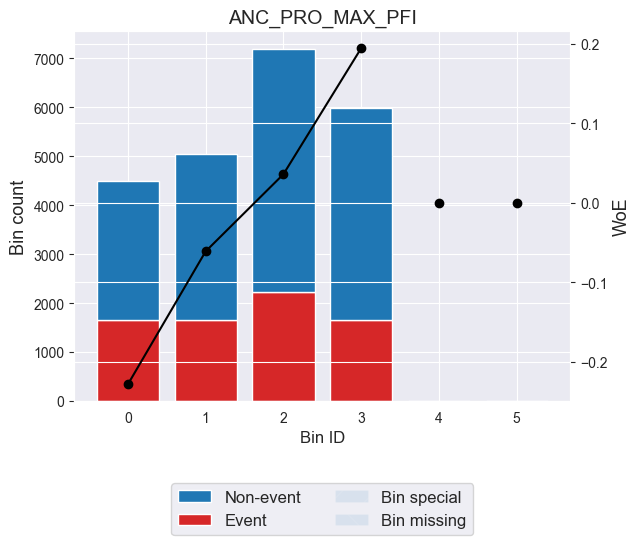

In [1648]:
optb.binning_table.plot(metric = "woe")

In [1649]:
df['ANC_PRO_MAX_PFI_2'] = optb.transform(df['ANC_PRO_MAX_PFI'], metric="woe")



In [1650]:
variable = "ANC_PRO_MAX_PFI"
target = "DET"

optb = OptimalBinning(name=variable, dtype="numerical", max_n_bins = 4)

# Ajout des données
optb.fit(df_ph[variable].values, df_ph[target])

# Affichage des informations sur la discrétisation optimale
optb.binning_table.build()

df_ph['ANC_PRO_MAX_PFI_2'] = optb.transform(df_ph['ANC_PRO_MAX_PFI'], metric = 'bins')

# Discretisation MT_REST_VIVRE

In [1651]:
variable = "MT_REST_VIVRE"
target = "DET"

optb = OptimalBinning(name=variable, dtype="numerical", max_n_bins = 2)

# Ajout des données
optb.fit(df_ph[variable].values, df_ph[target])

# Affichage des informations sur la discrétisation optimale
optb.binning_table.build()

df_ph['MT_REST_VIVRE'] = optb.transform(df_ph['MT_REST_VIVRE'], metric = 'bins')

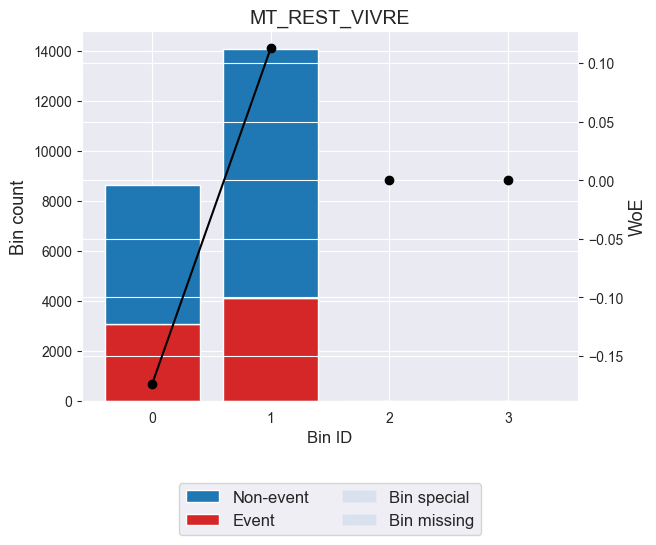

In [1652]:
optb.binning_table.plot(metric = "woe")

# Export du dataframe 

In [1653]:
df.to_csv('../data/df.csv', sep = ',')

df_ph.to_csv('../data/df_ph.csv', sep = ',')